# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Loading the data into a pandas dataframe

In [2]:
housing = pd.read_csv("train.csv")

# Checking the shape and the overall dataframe

In [3]:
housing.shape

(1460, 81)

The dataset has 1460 rows and 81 columns

In [4]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Checking the statistics of the numerical columns

In [6]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# Checking the statistics, specifically the 25th, 50th, 75th and 99th percentile values of the numerical columns

In [7]:
housing.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

# Checking for missing values

In [8]:
housing.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

# Listing which all columns exactly have missing values

In [9]:
missing = [i for i in housing.columns if housing[i].isnull().sum()>0]

for i in missing:
    print(i, "-" ,housing[i].isnull().sum())

LotFrontage - 259
Alley - 1369
MasVnrType - 8
MasVnrArea - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PoolQC - 1453
Fence - 1179
MiscFeature - 1406


# Selecting and removing columns with null value more than 60% as can make the interpretation skewed

In [10]:
null_col_sort = housing.isnull().sum()/len(housing)*100
null_col_sort.sort_values(ascending = False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

There are only 4 such features

In [11]:
missing_60 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
housing = housing.drop(missing_60,1)

In [12]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

# Listing the features with missing values again

In [13]:
missing = [i for i in housing.columns if housing[i].isnull().sum()/len(housing)>0]

for i in missing:
    print(i, "-" ,housing[i].isnull().sum()/len(housing)*100)

LotFrontage - 17.73972602739726
MasVnrType - 0.547945205479452
MasVnrArea - 0.547945205479452
BsmtQual - 2.5342465753424657
BsmtCond - 2.5342465753424657
BsmtExposure - 2.6027397260273974
BsmtFinType1 - 2.5342465753424657
BsmtFinType2 - 2.6027397260273974
Electrical - 0.0684931506849315
FireplaceQu - 47.26027397260274
GarageType - 5.5479452054794525
GarageYrBlt - 5.5479452054794525
GarageFinish - 5.5479452054794525
GarageQual - 5.5479452054794525
GarageCond - 5.5479452054794525


# Checking the relationship between the columns with missing values and the SalePrice

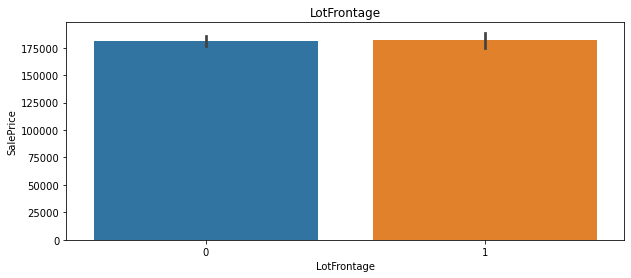

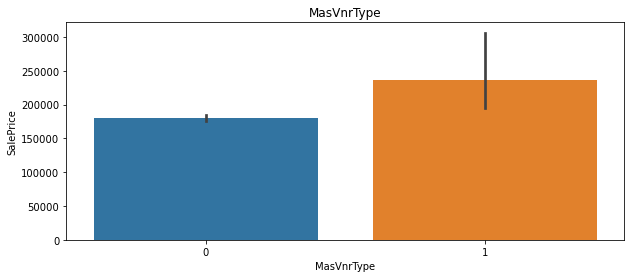

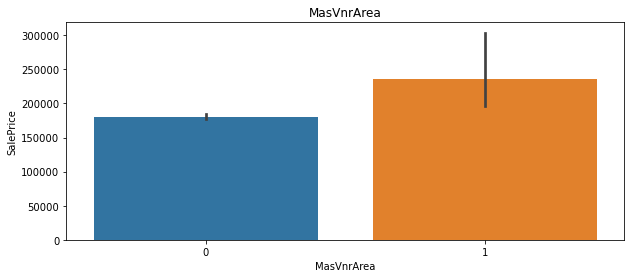

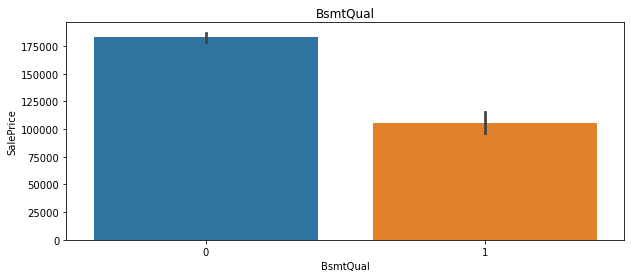

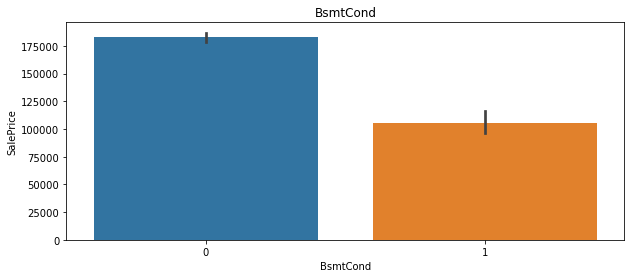

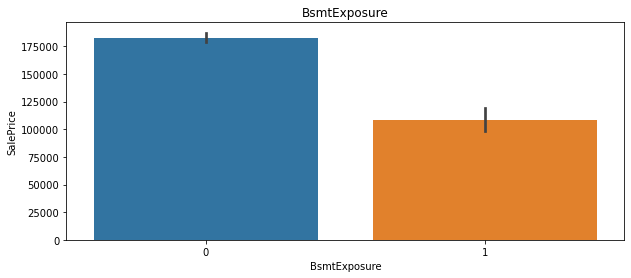

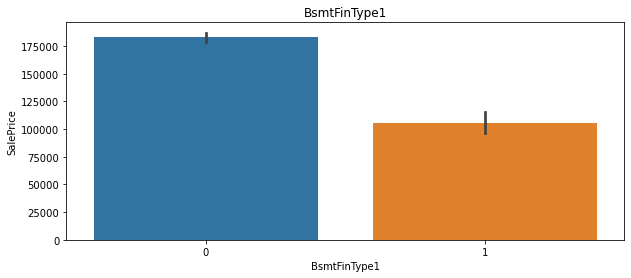

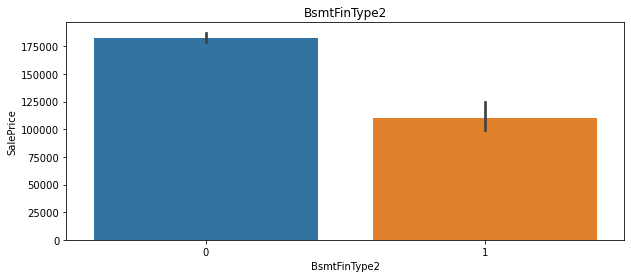

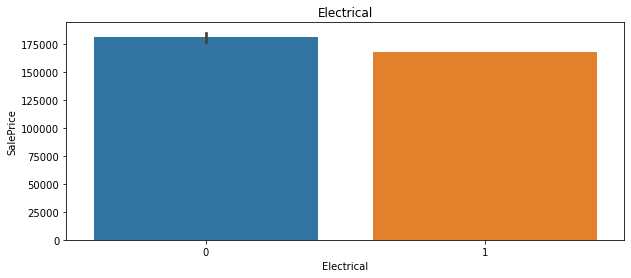

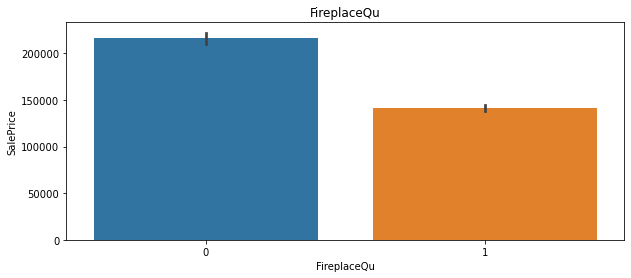

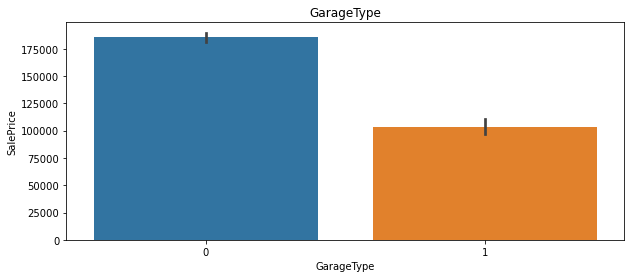

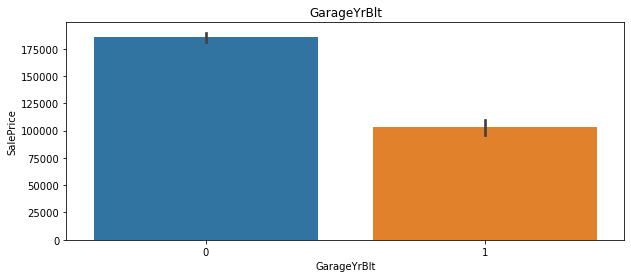

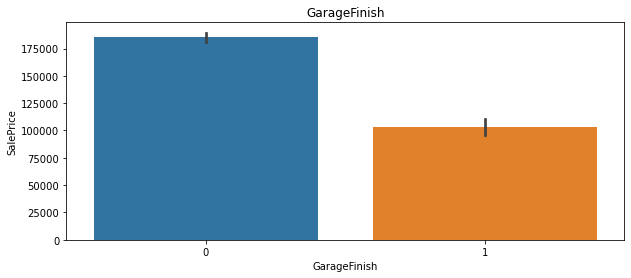

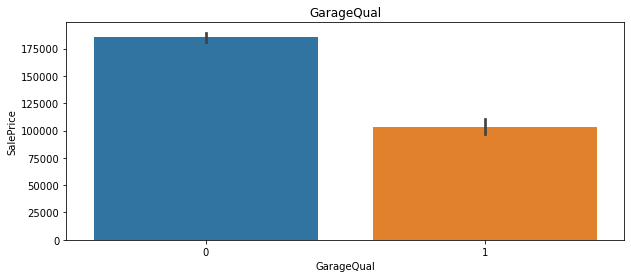

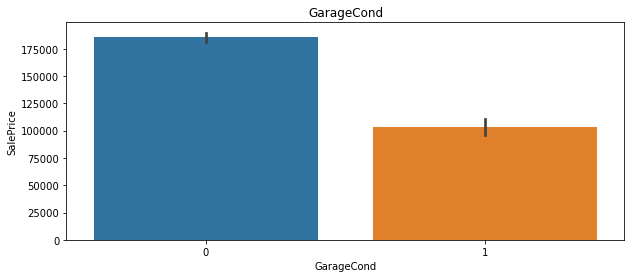

In [14]:
for i in missing:
    house = housing.copy()
    
    #1 - Value Missing; 0 - Value Present
    house[i] = np.where(house[i].isnull(), 1, 0)
    
    plt.figure(figsize=(10,4))
    sns.barplot(x = i, y = "SalePrice", data = house)
    plt.title(i)
    plt.show()

A clear relationship between the missing values and the sales can be seen. Therefore, the missing values needs to be dealtwith carefully.

# Dropping the 'Id' column

In [15]:
housing = housing.drop('Id',1)

In [16]:
housing.shape

(1460, 76)

# Treating features having meaningful missing values

These missing values have a meaning, and therefore the mentioned values

In [17]:
housing.BsmtQual = housing.BsmtQual.replace(np.nan, 'No Basement')

In [18]:
housing.BsmtCond = housing.BsmtCond.replace(np.nan, 'No Basement')

In [19]:
housing.BsmtExposure = housing.BsmtExposure.replace(np.nan, 'No Basement')

In [20]:
housing.BsmtFinType1 = housing.BsmtFinType1.replace(np.nan, 'No Basement')

In [21]:
housing.BsmtFinType2 = housing.BsmtFinType2.replace(np.nan, 'No Basement')

In [22]:
housing.FireplaceQu = housing.FireplaceQu.replace(np.nan, 'No Fireplace')

In [23]:
housing.GarageType = housing.GarageType.replace(np.nan, 'No Garage')

In [24]:
housing.GarageFinish = housing.GarageFinish.replace(np.nan, 'No Garage')

In [25]:
housing.GarageQual = housing.GarageQual.replace(np.nan, 'No Garage')

In [26]:
housing.GarageCond = housing.GarageCond.replace(np.nan, 'No Garage')

# Checking columns with missing values

In [27]:
missing = [i for i in housing.columns if housing[i].isnull().sum()/len(housing)>0]

for i in missing:
    print(i, "-" ,housing[i].isnull().sum()/len(housing)*100)

LotFrontage - 17.73972602739726
MasVnrType - 0.547945205479452
MasVnrArea - 0.547945205479452
Electrical - 0.0684931506849315
GarageYrBlt - 5.5479452054794525


# Creating a list of features that have the Years

In [28]:
years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
years

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# Checking the contents of the years

In [29]:
for i in years:
    print(i, housing[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

# Checking the relationship between YrSold and SalePrice

Text(0.5, 1.0, 'Median Selling Price vs Selling Year')

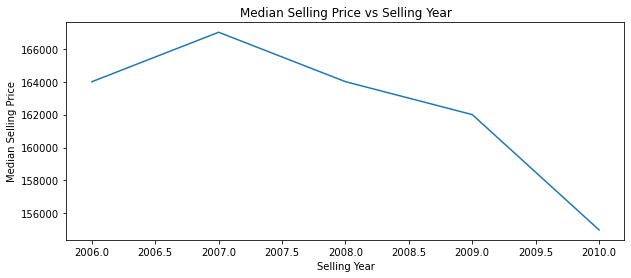

In [30]:
plt.figure(figsize = (10,4))
housing.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Selling Year')
plt.ylabel('Median Selling Price')
plt.title("Median Selling Price vs Selling Year")

It is evident from the graph that as the years went by the selling price of the houses decline, which is strange, as usually the reverse happens.

# Checking the trend of SalePrice with the other year features

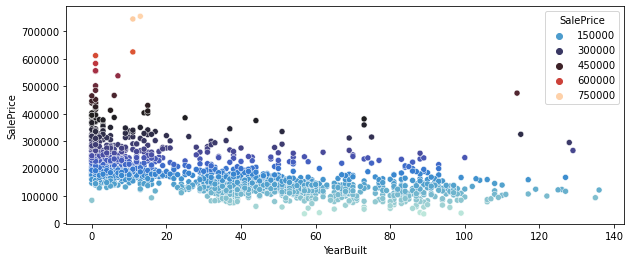

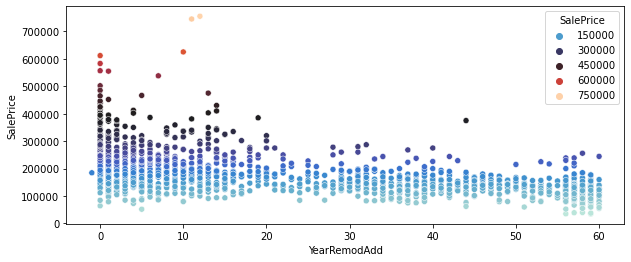

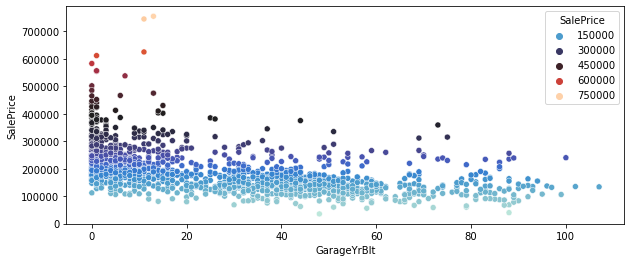

In [31]:
for i in years:
    if i!='YrSold':
        house=housing.copy()
        #Difference beween 'YrSold' and other Year variables
        house[i] = house['YrSold']-house[i]
        
        plt.figure(figsize = (10,4))
        sns.scatterplot(x = i, y = "SalePrice", data = house, hue = 'SalePrice', palette = 'icefire') 
        
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

It is evident from the above graphs that the sales and year do have an inverse relationship

# Getting a list of features that are numerical

In [32]:
numeric = [i for i in housing.columns if housing[i].dtype != 'O']
housing[numeric].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

# Checking the correlation between the numeric variables

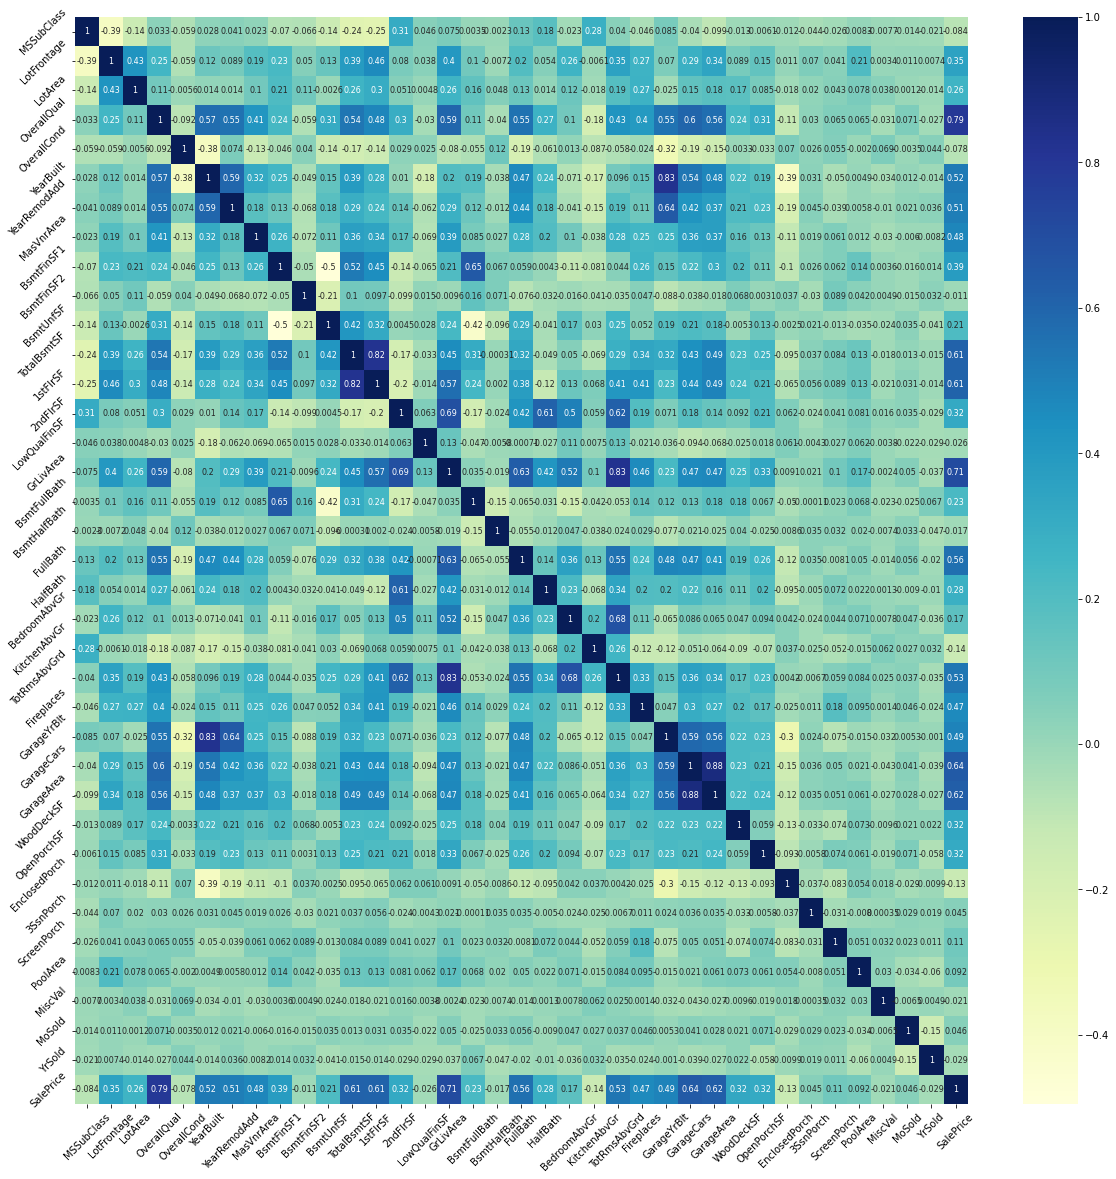

In [33]:
plt.figure(figsize=(20,20))

sns.heatmap(housing[numeric].corr(), annot=True, cmap='YlGnBu', annot_kws={"size": 8})
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Checking the relationship between the numeric variables and the SalePrice

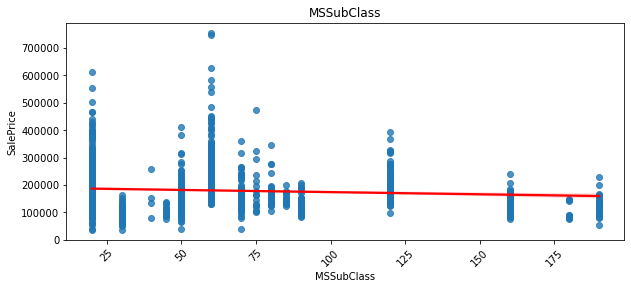

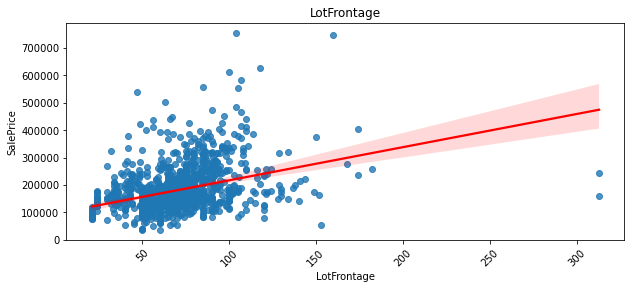

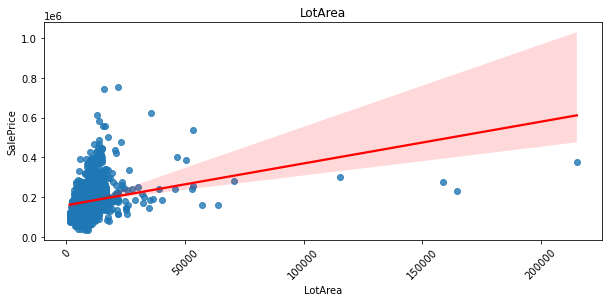

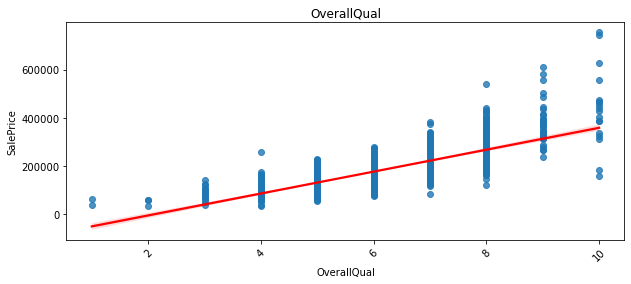

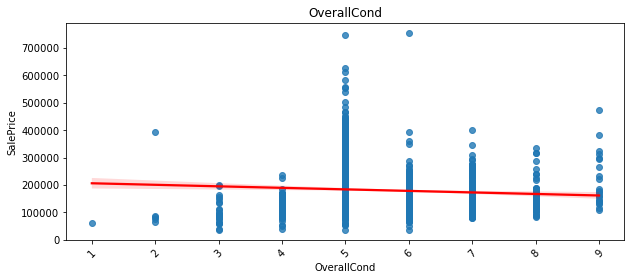

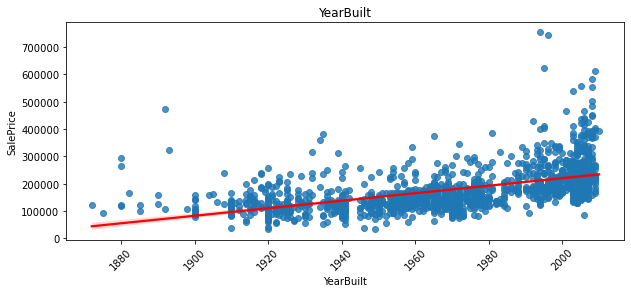

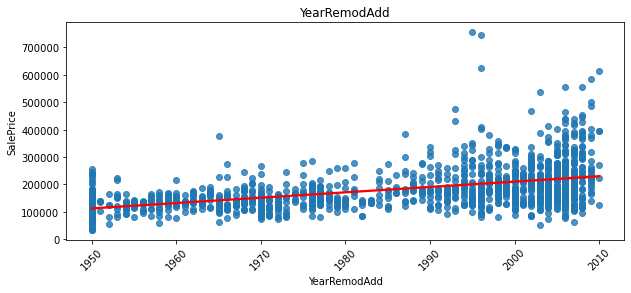

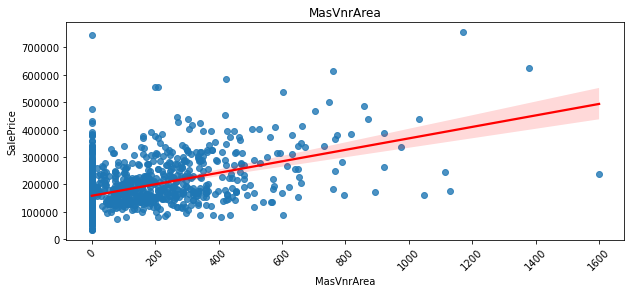

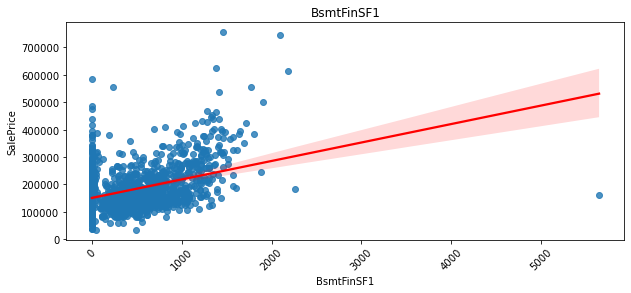

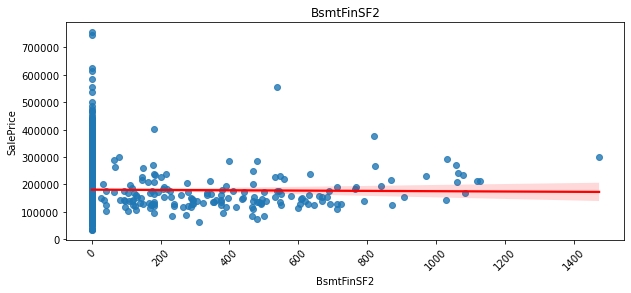

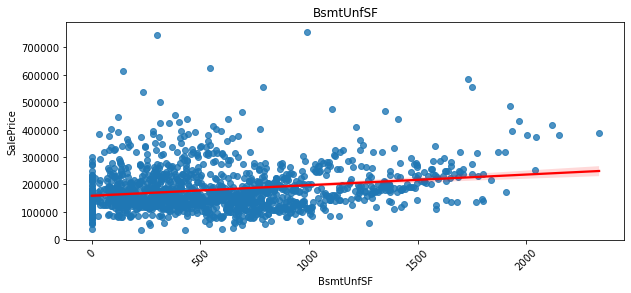

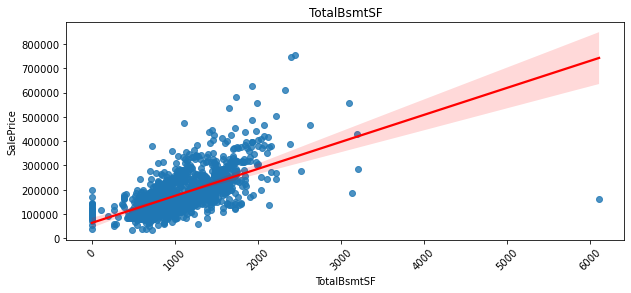

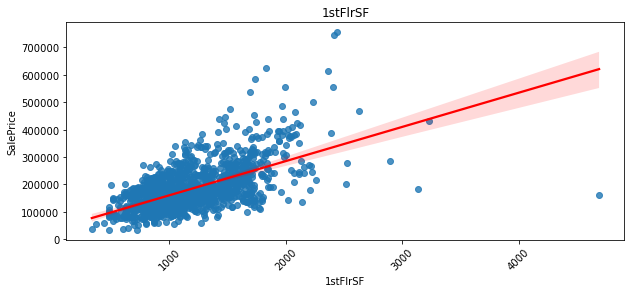

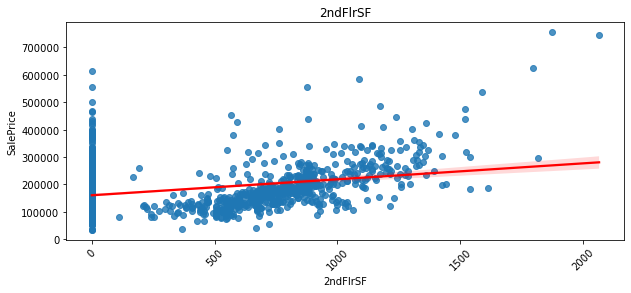

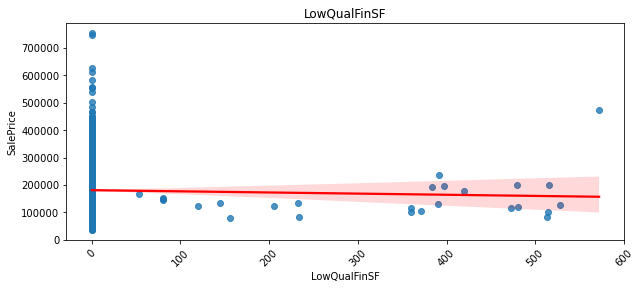

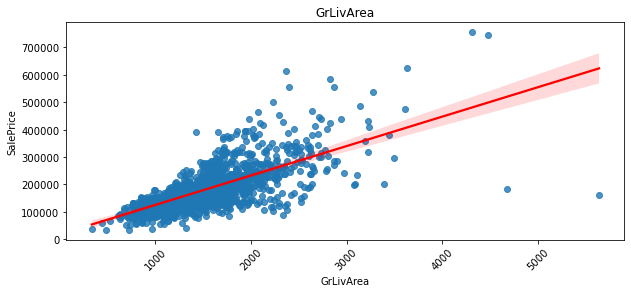

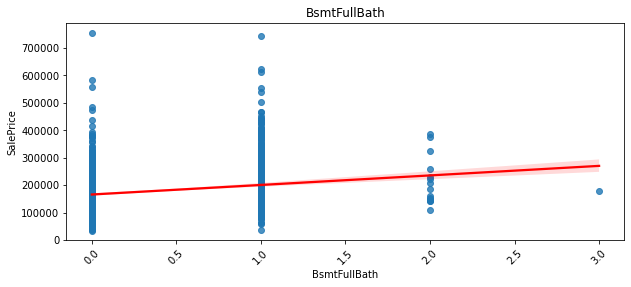

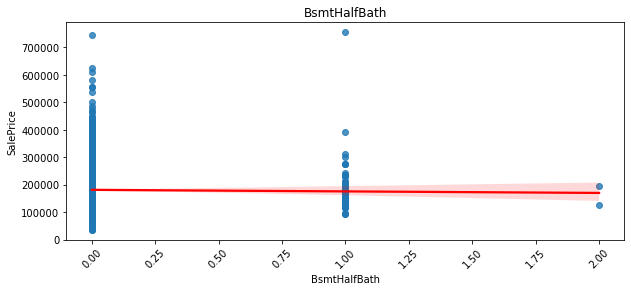

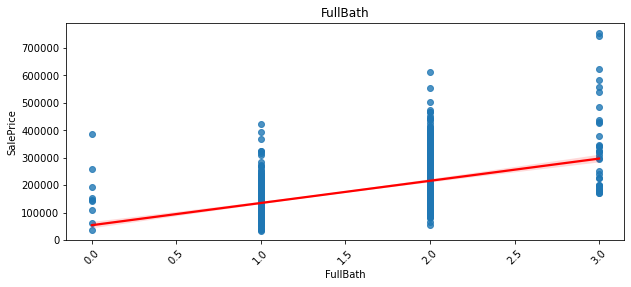

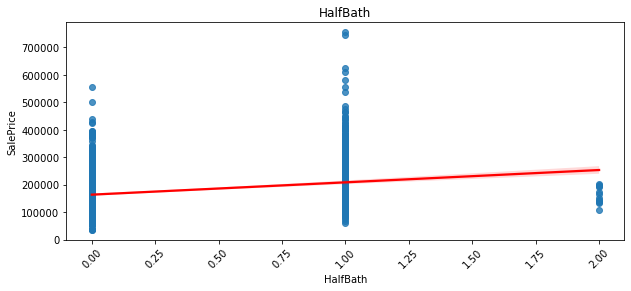

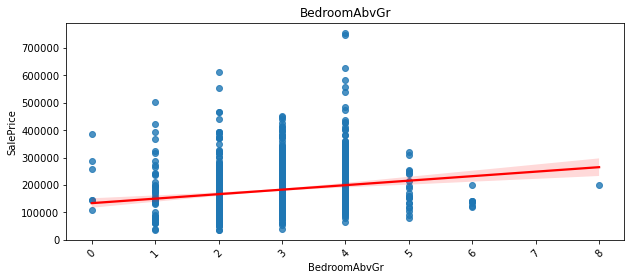

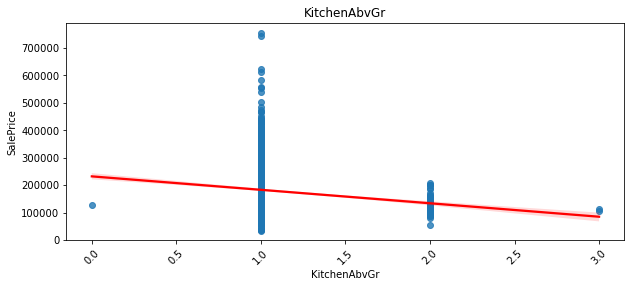

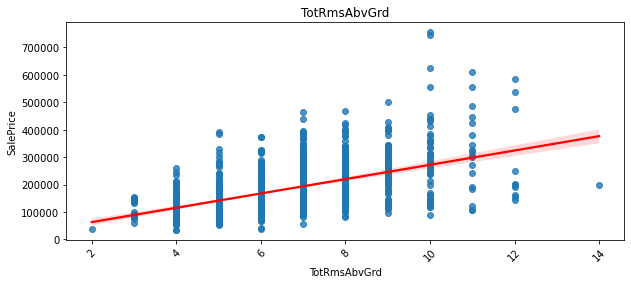

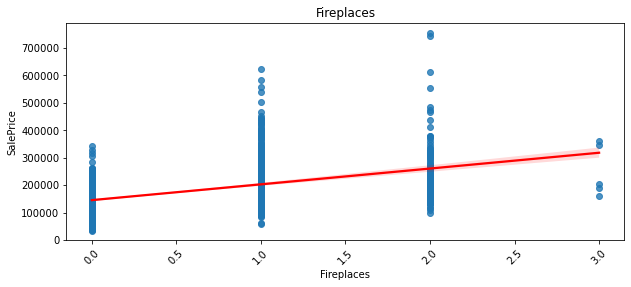

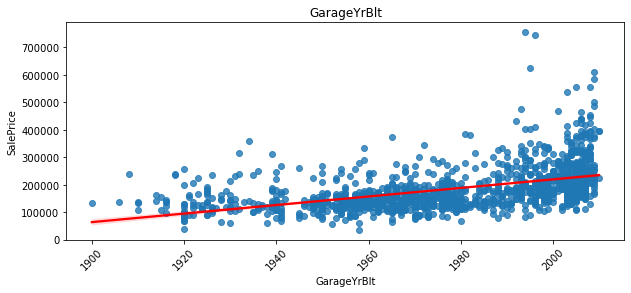

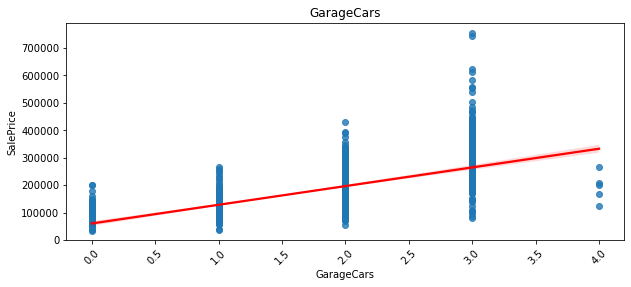

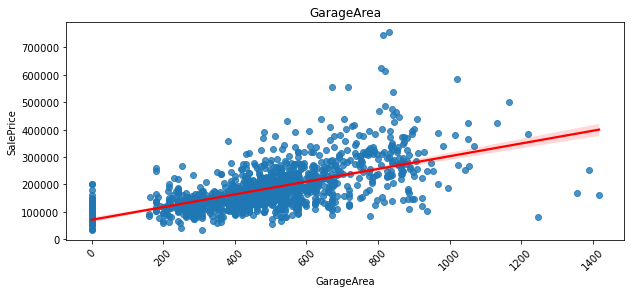

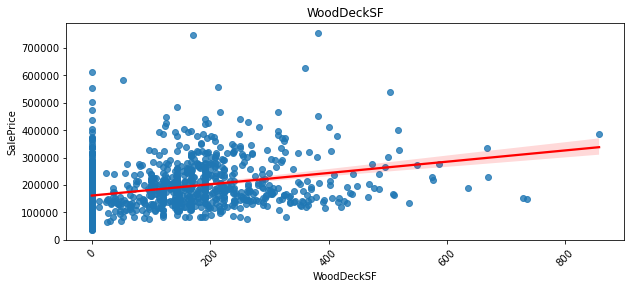

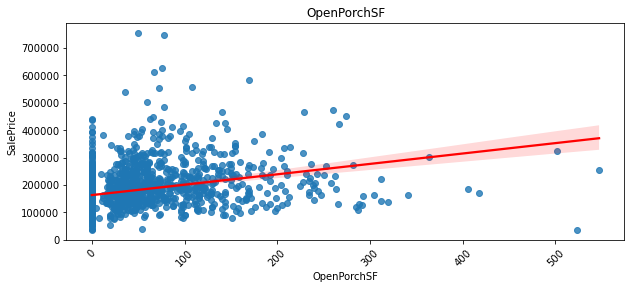

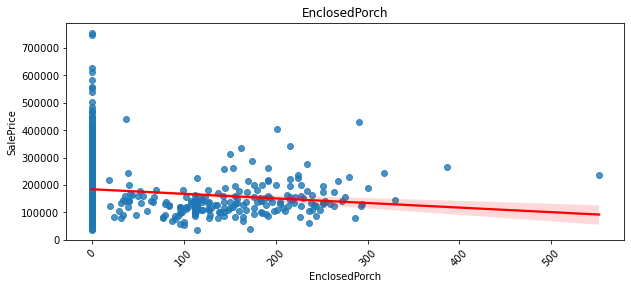

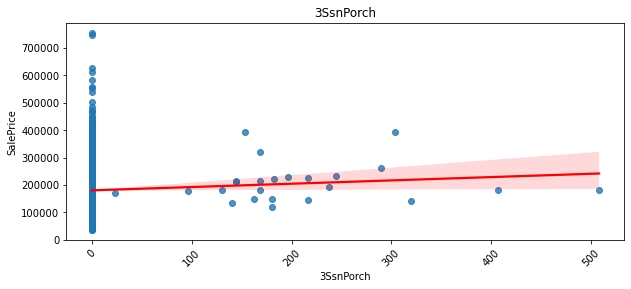

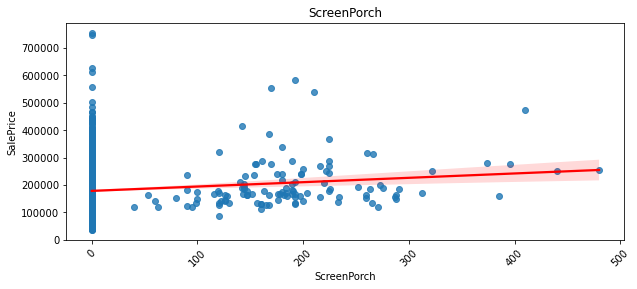

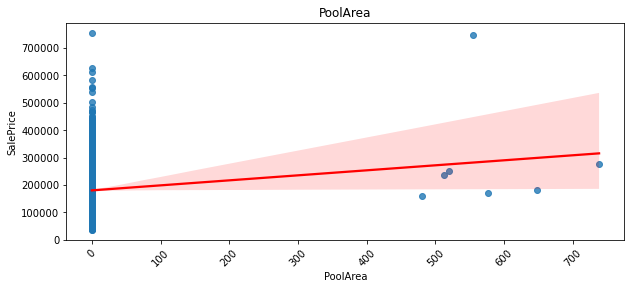

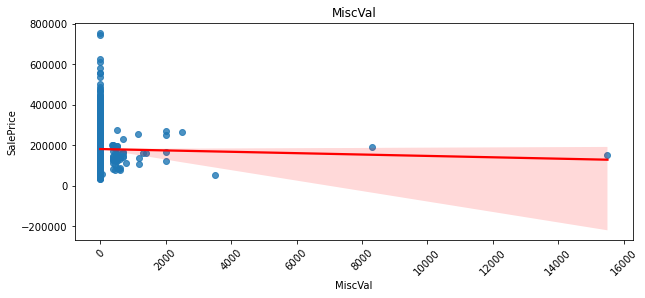

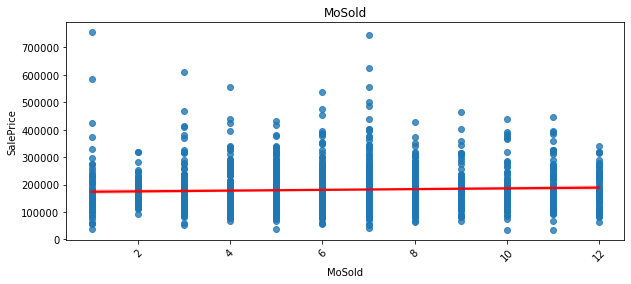

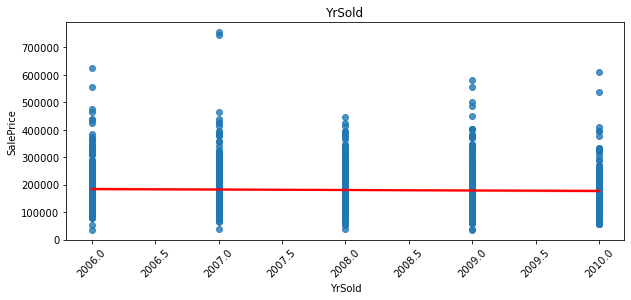

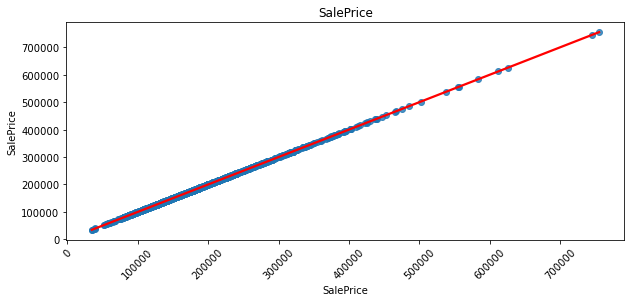

In [34]:
for i in numeric:
    house = housing.copy()
    plt.figure(figsize=(10,4))
    sns.regplot(data = house, y = "SalePrice", x = i, line_kws = {"color": "red"})
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.xticks(rotation = 45)
    plt.title(i)
    plt.show()

#### Inferences:
- MSSubClass, BSmtUnfSF, MoSold, YrSold - show no trend

- LotFrontage, LotArea, OverallQual, YearBuilt, YearRemodAdd, MAsVnrArea, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, Full Bath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, 3SsnPorch, ScreenPorch, PoolArea show positive trend

- OverallCond, LowQualFinSF, BsmtHalfBath, KitchenAbcGrd, EnclosedPorch, MiscVal show negative trend

# Checking for outliers in the numeric features

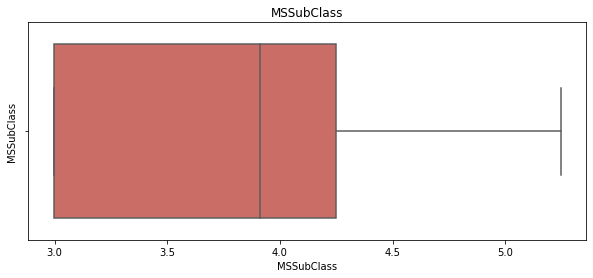

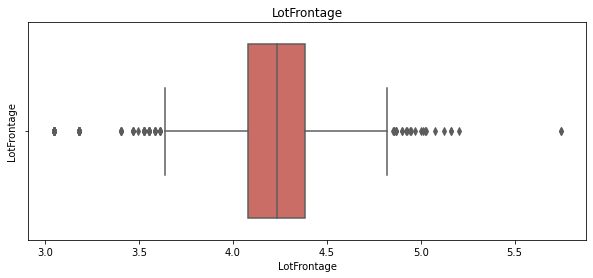

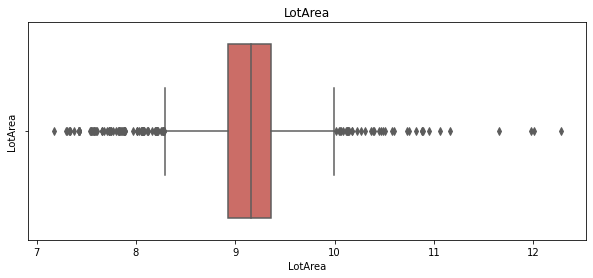

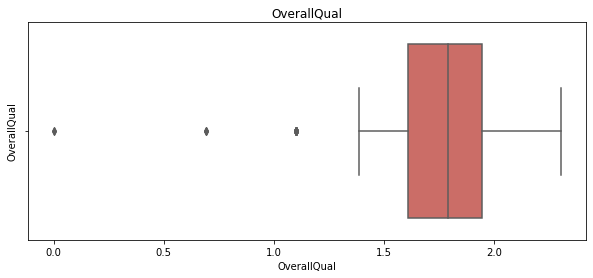

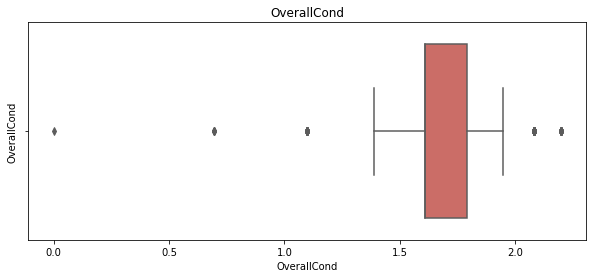

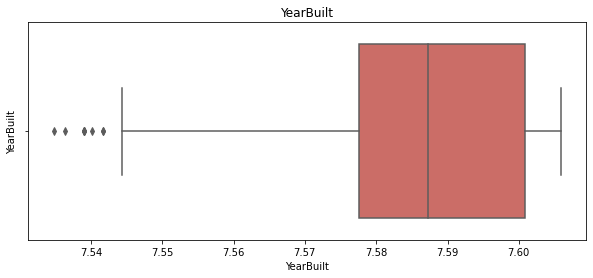

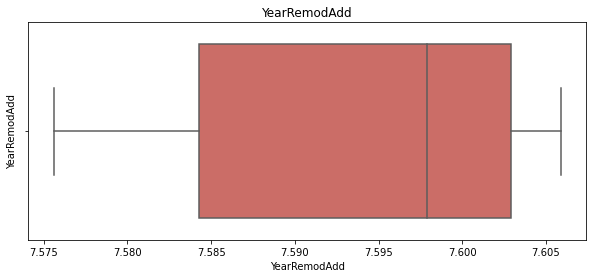

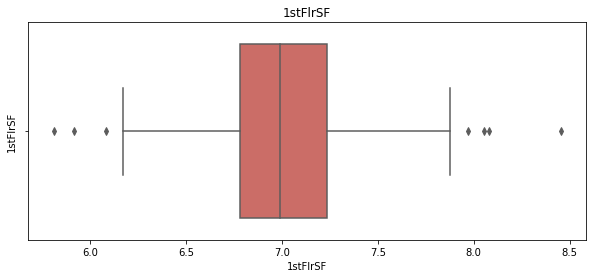

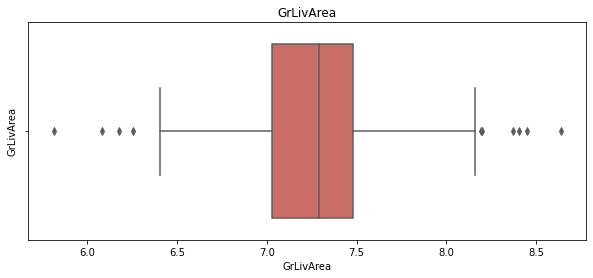

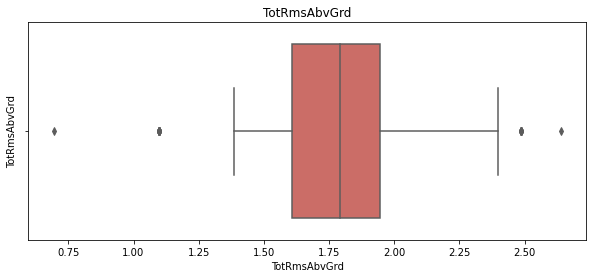

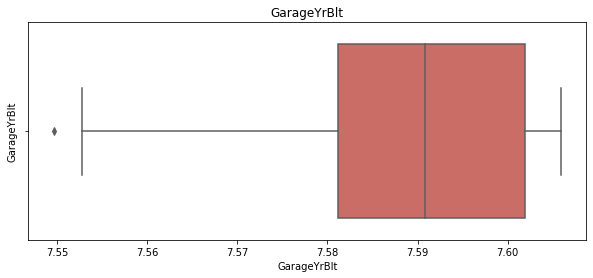

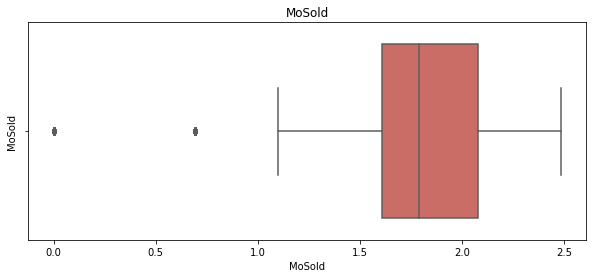

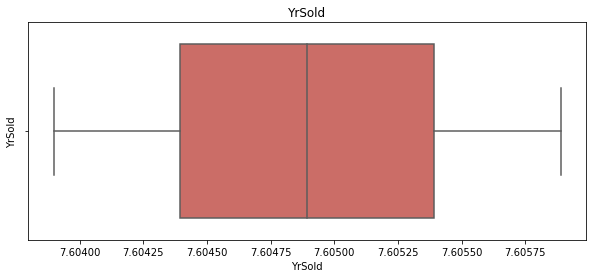

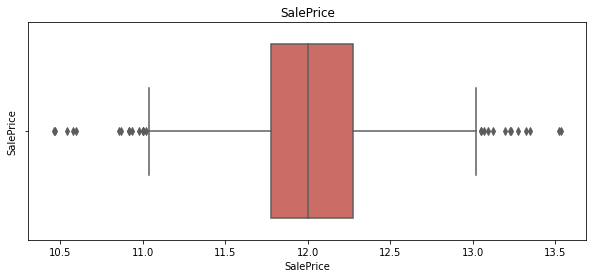

In [35]:
for i in numeric:
    house = housing.copy()
    
    if 0 in house[i].unique():
        pass
    else:
        house[i] = np.log(house[i])
        plt.figure(figsize=(10,4))
        sns.boxplot(house[i], palette = 'hls')
        plt.ylabel(i)
        plt.title(i)
        plt.show()   

#### Features with Outliers: 
- LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, 1stFlrSF, GrLivArea, TotRmsAbvGrd, GarageYrBlt, MoSold, SalePrice 

# Dropping the outliers

Checking shape before dropping the outliers

In [36]:
housing.shape

(1460, 76)

In [37]:
def outlier_drop(x):
    for col in numeric:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
housing = outlier_drop(housing)

Checking shape after dropping the outliers

In [38]:
housing.shape

(1107, 76)

# Getting a list of the categorical variables

In [39]:
categorical = [i for i in housing.columns if housing[i].dtypes=='O']
housing[categorical].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No Fireplace     Attchd   
1          Y      SBrkr          TA        Typ            TA     Attchd   
2          Y      SBrkr          Gd        Typ            TA     Attchd   
3          Y      SBrkr          Gd        Typ            Gd     Detchd   
4          Y      SBrkr          Gd        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [40]:
housing.shape

(1107, 76)

# Checking the unique number of values in the categorical variables

In [41]:
for i in categorical:
    print(i, "-", len(housing[i].unique()))

MSZoning - 5
Street - 2
LotShape - 4
LandContour - 4
Utilities - 1
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 6
BldgType - 5
HouseStyle - 8
RoofStyle - 5
RoofMatl - 6
Exterior1st - 14
Exterior2nd - 16
MasVnrType - 4
ExterQual - 4
ExterCond - 4
Foundation - 6
BsmtQual - 5
BsmtCond - 5
BsmtExposure - 5
BsmtFinType1 - 7
BsmtFinType2 - 7
Heating - 5
HeatingQC - 5
CentralAir - 2
Electrical - 6
KitchenQual - 4
Functional - 6
FireplaceQu - 6
GarageType - 6
GarageFinish - 3
GarageQual - 5
GarageCond - 5
PavedDrive - 3
SaleType - 9
SaleCondition - 6


# Checking the relationship between the categorical variables and the SalePrice

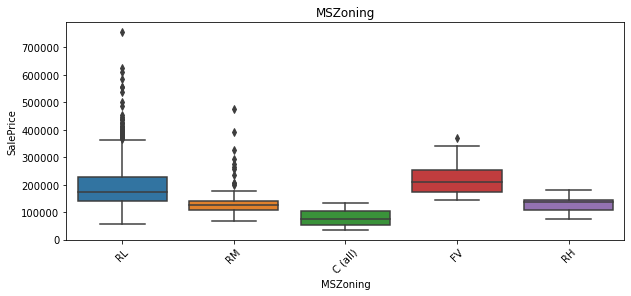

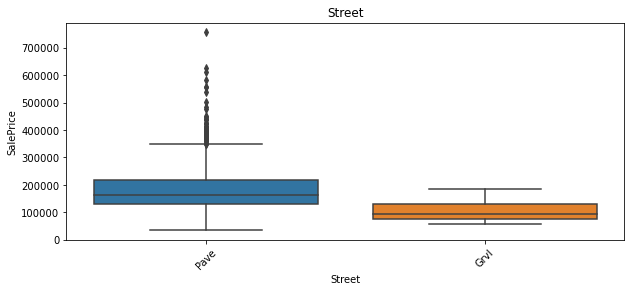

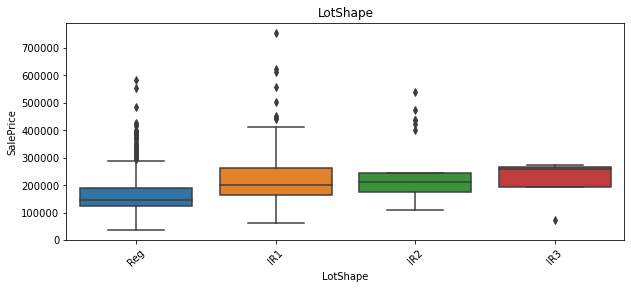

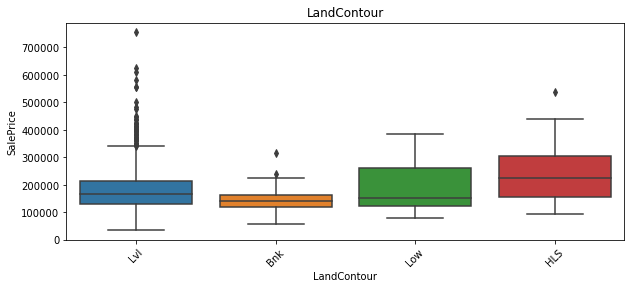

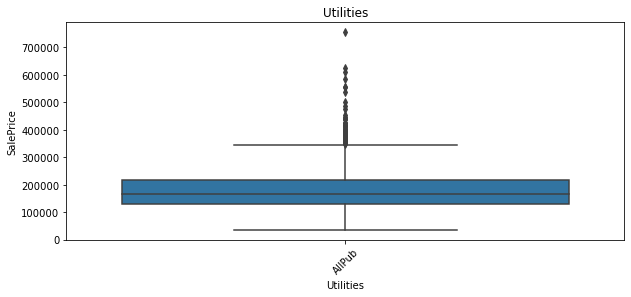

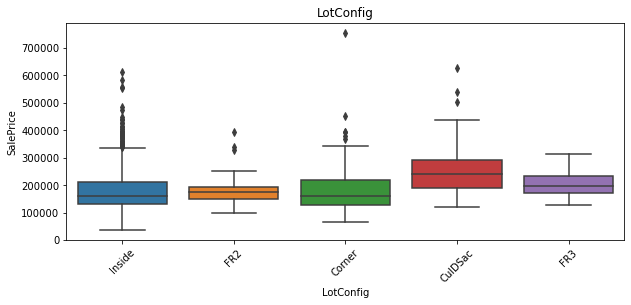

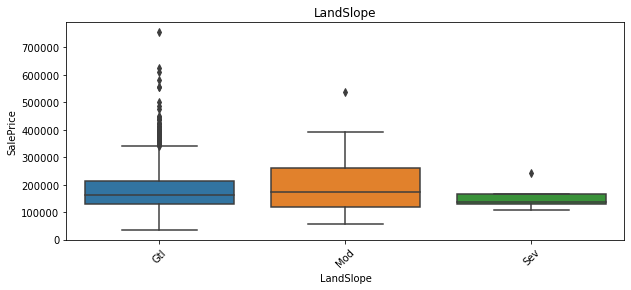

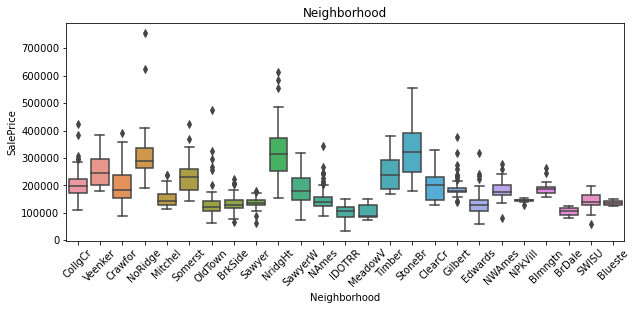

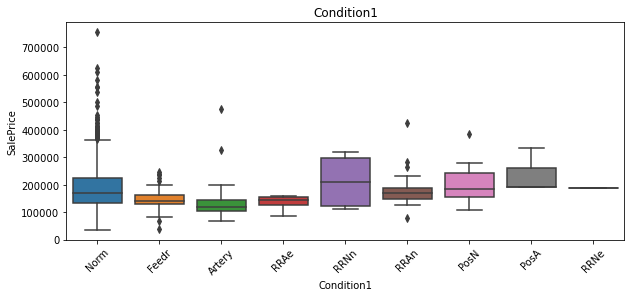

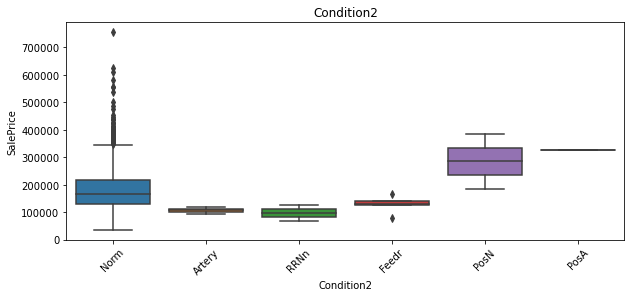

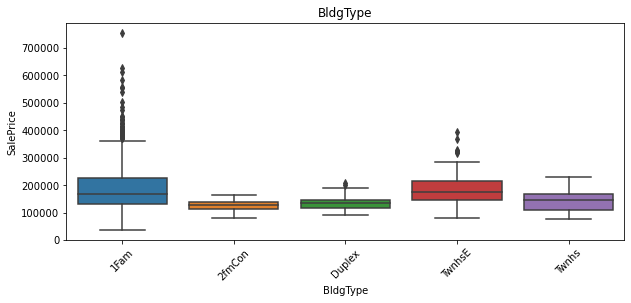

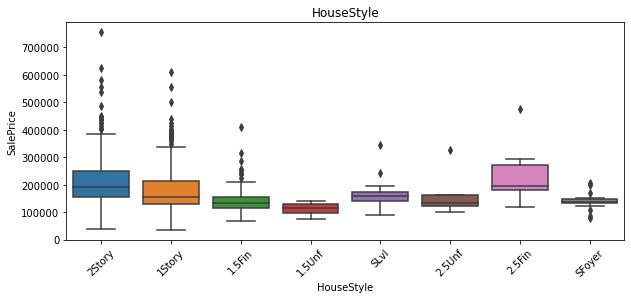

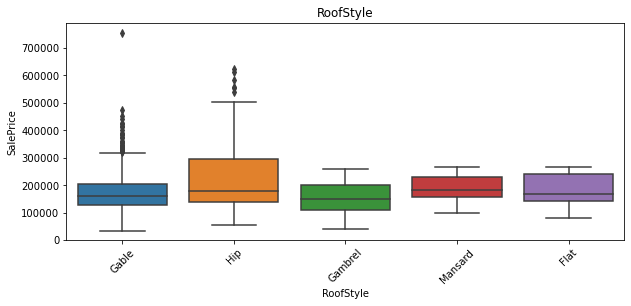

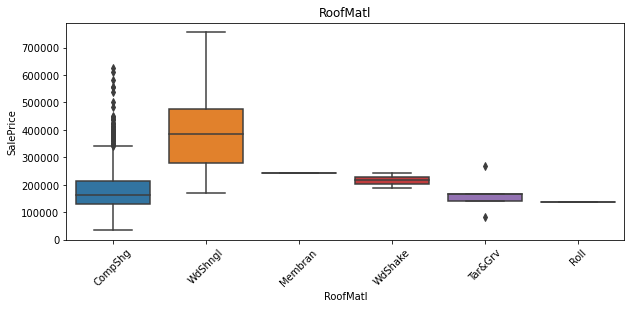

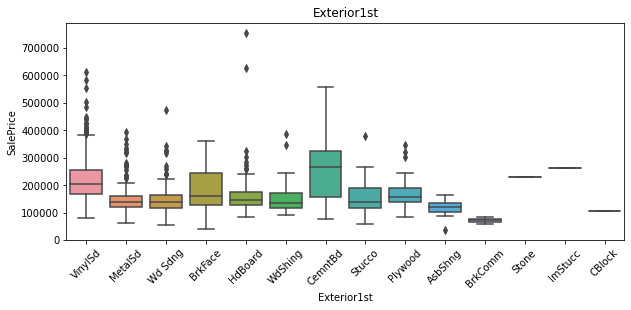

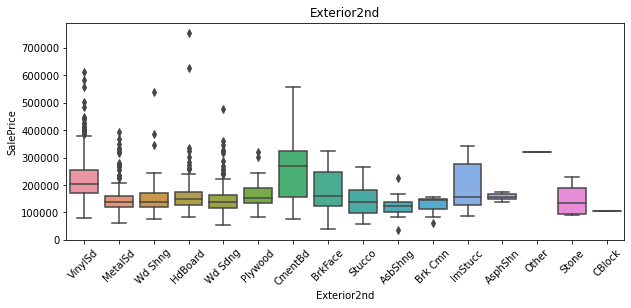

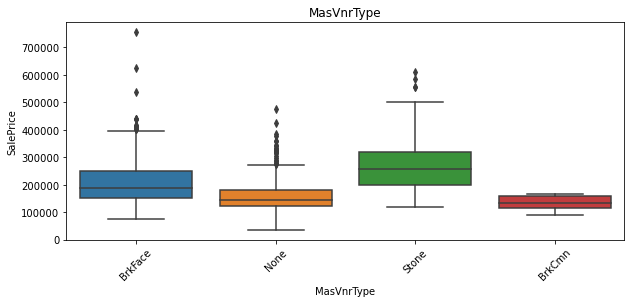

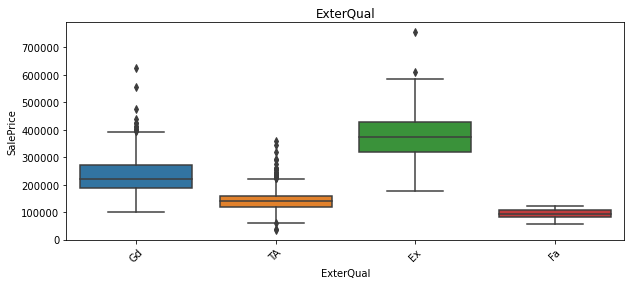

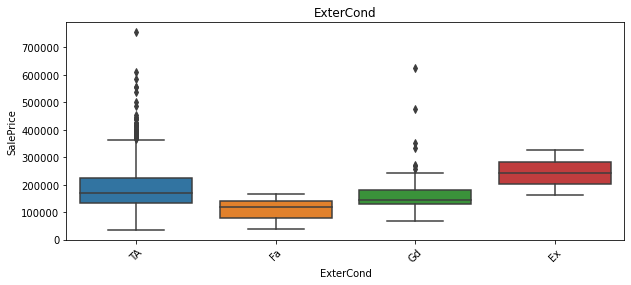

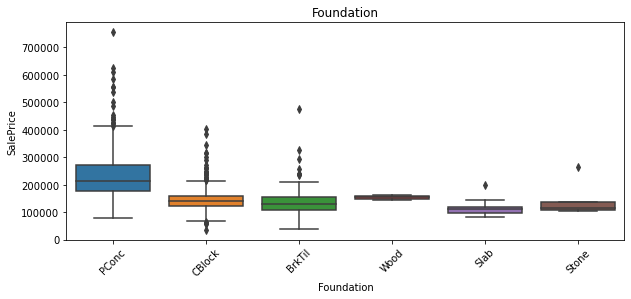

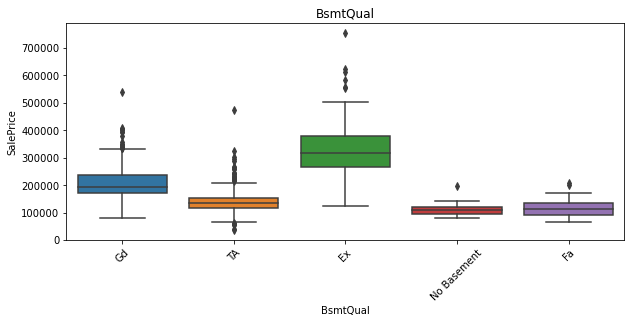

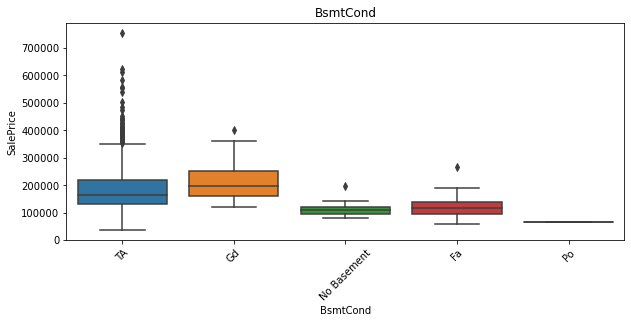

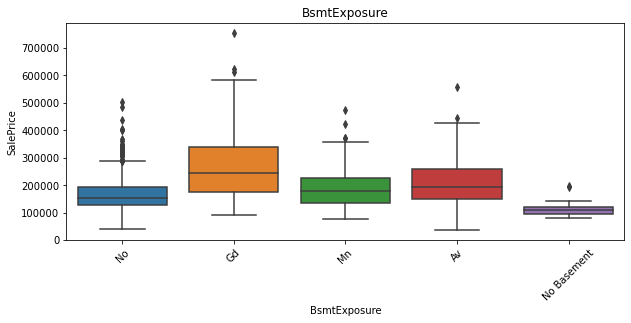

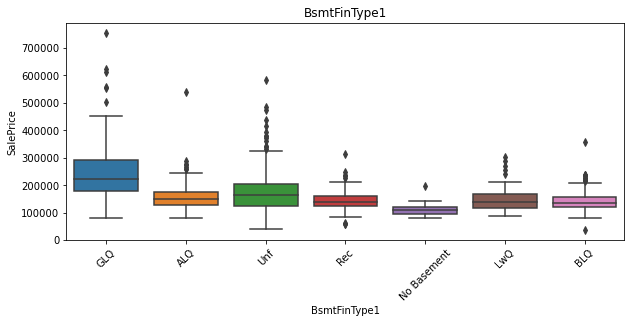

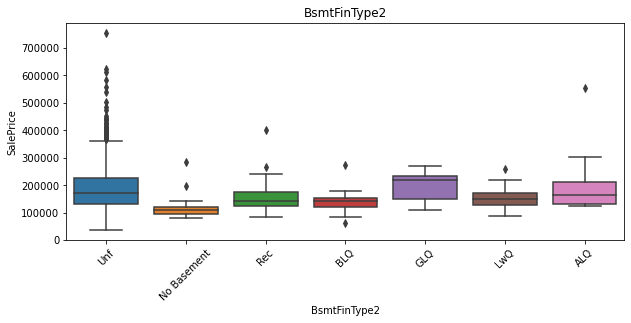

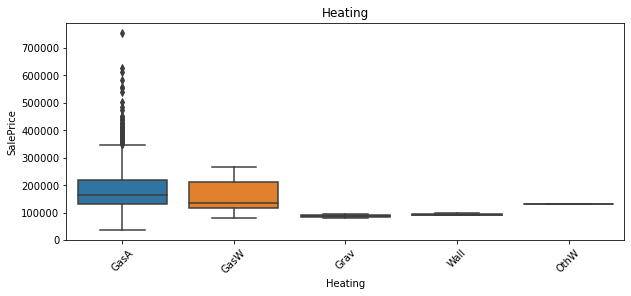

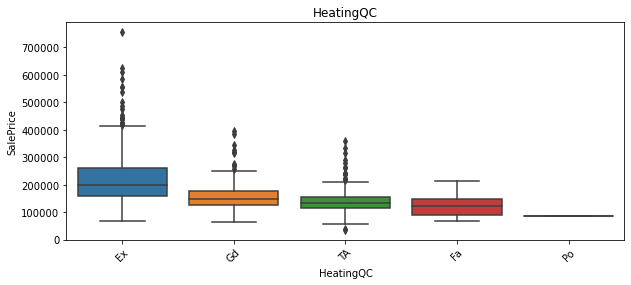

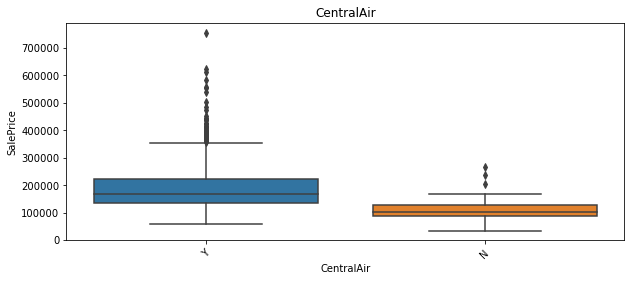

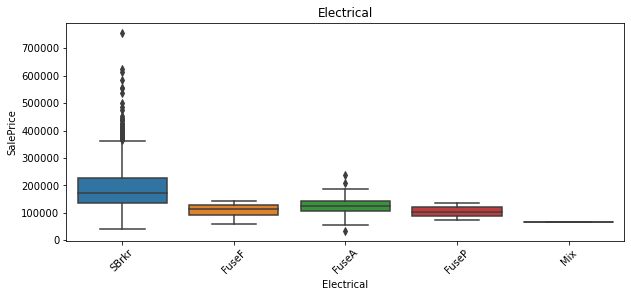

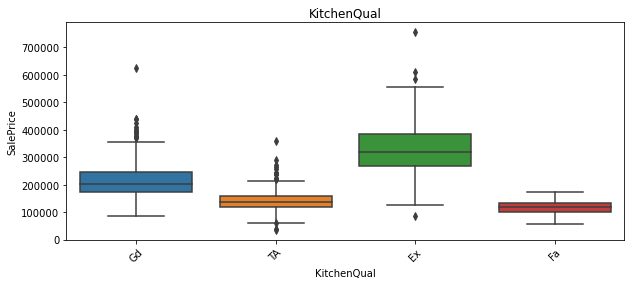

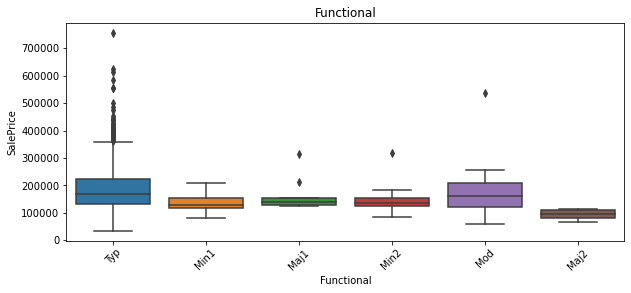

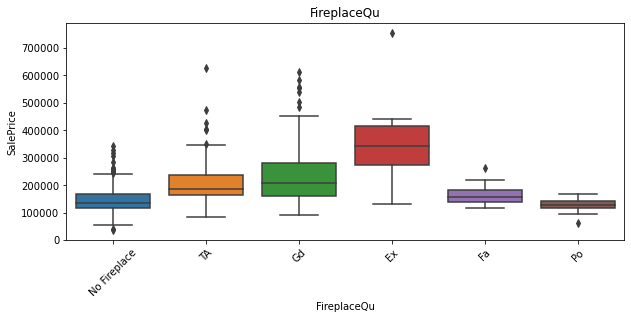

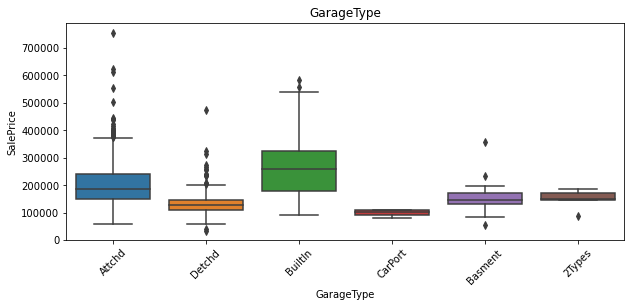

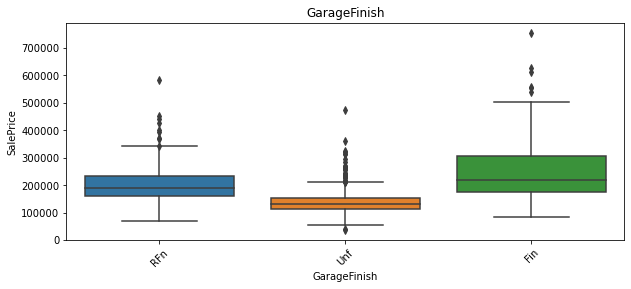

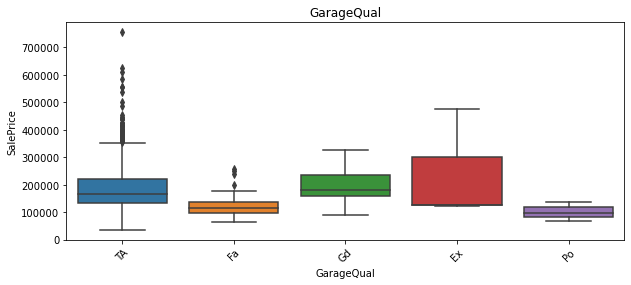

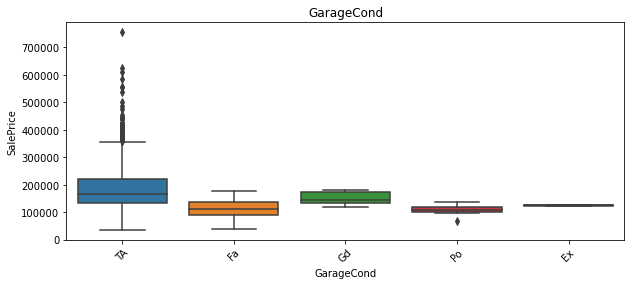

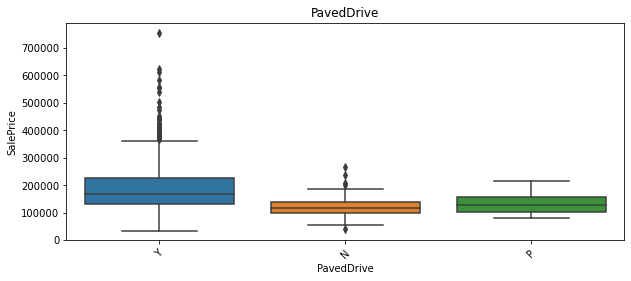

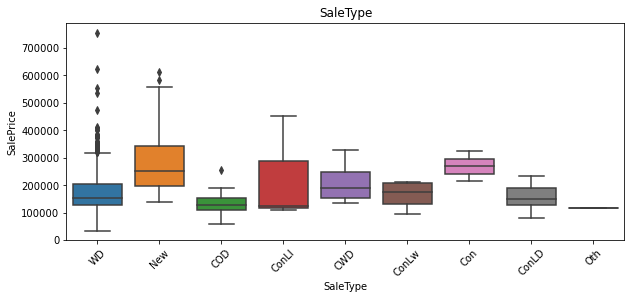

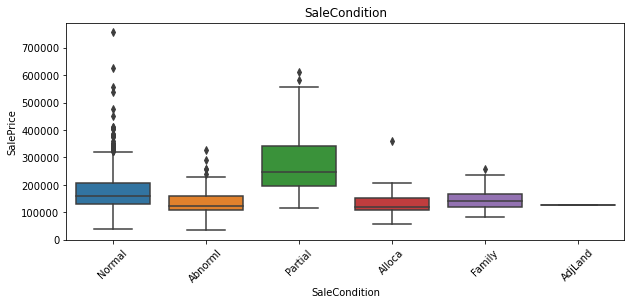

In [42]:
for i in categorical:
    house = housing.copy()
    plt.figure(figsize=(10,4))
    sns.boxplot(x = i, y = "SalePrice", data = house)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.xticks(rotation = 45)
    plt.title(i)
    plt.show()

Every feature has a different kind of relationship with the SalePrice

# Missing Value Treatment

### Categorical Features

In [43]:
#Checking features with missing values
missing_cat = [i for i in housing[categorical] if housing[i].isnull().sum()>0]

for i in missing_cat:
    print(i, "-", np.round(housing[i].isnull().sum()))

Electrical - 1


In [44]:
# Replacing the missing values with "Missing"
for i in missing_cat:
    housing[missing_cat] = housing[missing_cat].fillna('Missing')
    
housing[missing_cat].isnull().sum()

Electrical    0
dtype: int64

In [45]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [46]:
housing.shape

(1107, 76)

### Numerical Features

In [47]:
#Checking features with missing values
missing_num = [i for i in housing.columns if housing[i].isnull().sum()>0 and housing[i].dtypes!='O']

for i in missing_num:
    print(i, "-", np.round(housing[i].isnull().sum()))

In [48]:
# Replacing the missing values with the median values
for i in missing_num:
    median = housing[i].median()
    housing[i].fillna(median,inplace=True)
    
housing[missing_num].isnull().sum() 

Series([], dtype: float64)

No numerical features have missing values

### Final check for null values

In [49]:
housing.isnull().sum().sort_values(ascending=False)

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

We can confirm there are no missing values left in the dataset

In [50]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [51]:
housing.shape

(1107, 76)

# Handling Date Variables

In [52]:
#Getting the number of years since the YrSold
for i in years: 
    housing[i]=housing['YrSold']-housing[i]

In [53]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [54]:
housing.shape

(1107, 76)

In [55]:
housing[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

Since the numerical variables are skewed we will perform log normal distribution

In [56]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd      

In [57]:
housing.shape

(1107, 76)

In [58]:
numerical_var =['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for i in numerical_var:
    housing[i]=np.log(housing[i])

In [59]:
housing.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.174387  9.041922   Pave      Reg         Lvl   
1          20       RL     4.382027  9.169518   Pave      Reg         Lvl   
2          60       RL     4.219508  9.328123   Pave      IR1         Lvl   
3          70       RL     4.094345  9.164296   Pave      IR1         Lvl   
4          60       RL     4.430817  9.565214   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.752270       854             0   7.444249   
1          Y      SBrkr  7.140453         0             0   7.140453   
2          Y      SBrkr  6.824374       866             0   7.487734   
3          Y      SBrkr  6.867974       756             0   7.448334   
4          Y      SBrkr  7.043160      1053             0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0          Gd             8        Typ           0  No Fireplace     Attchd   
1          TA             6        Typ           1            TA     Attchd   
2          Gd             6        Typ           1            TA     Attchd   
3          Gd

In [60]:
housing.shape

(1107, 76)

# Checking correlation between all variables

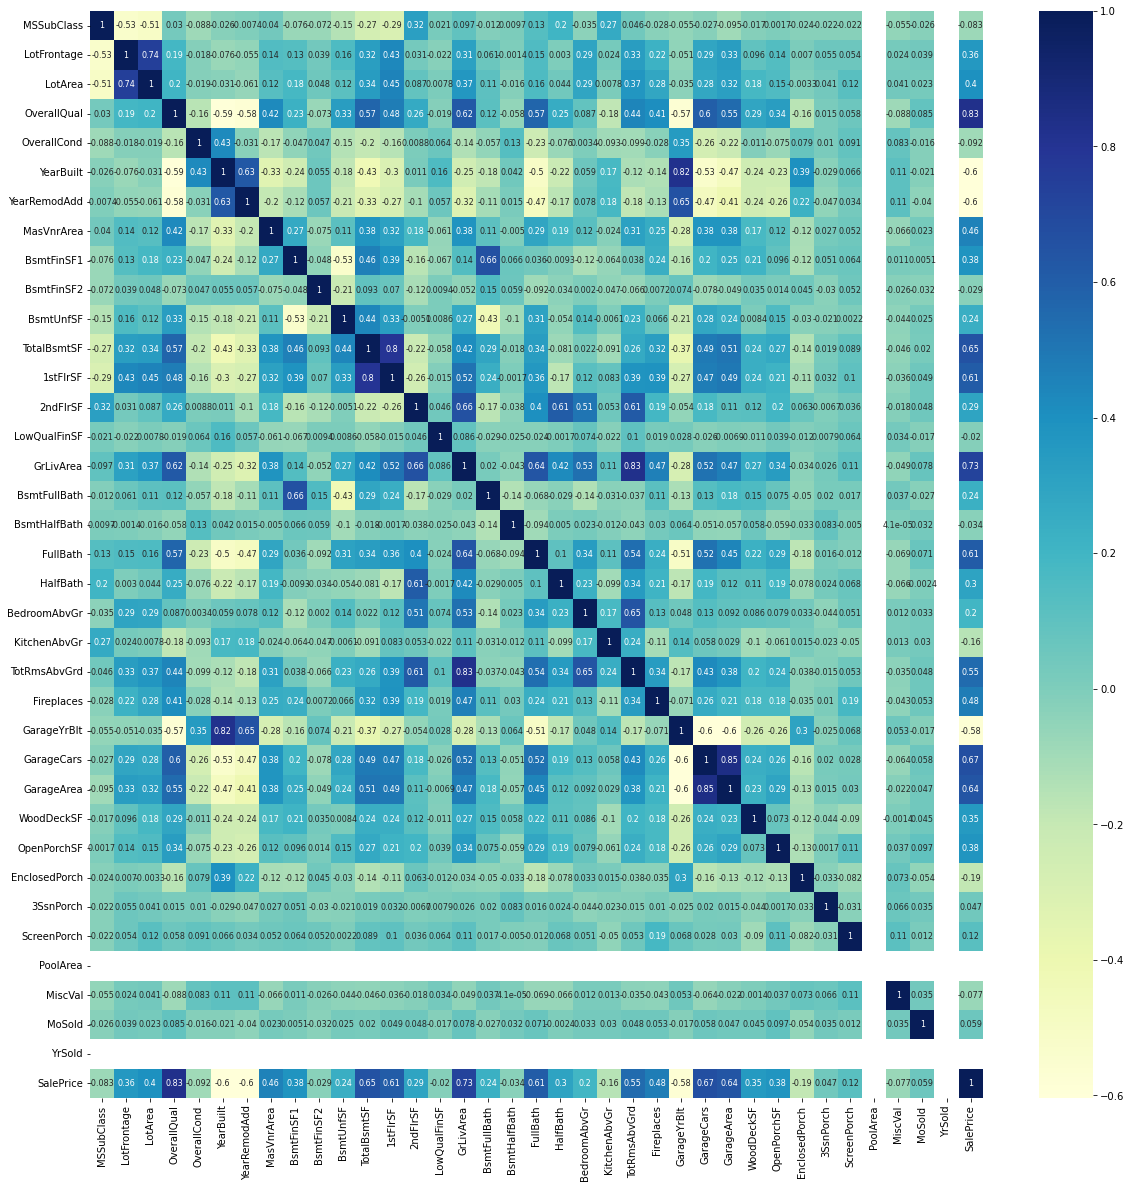

In [61]:
plt.figure(figsize=(20,20))

sns.heatmap(housing.corr(), annot=True, cmap='YlGnBu', annot_kws={"size": 8})
plt.show()

# Creating Dummy Variables

In [62]:
housing = pd.get_dummies(housing, drop_first = True)

In [63]:
housing.shape

(1107, 234)

In [64]:
housing

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0             60     4.174387  9.041922            7            5          5   
1             20     4.382027  9.169518            6            8         31   
2             60     4.219508  9.328123            7            5          7   
3             70     4.094345  9.164296            7            5         91   
4             60     4.430817  9.565214            8            5          8   
...          ...          ...       ...          ...          ...        ...   
1454          20     4.127134  8.922658            7            5          5   
1455          60     4.127134  8.976768            6            5          8   
1456          20     4.442651  9.486076            6            6         32   
1458          20     4.219508  9.181632            5            6         60   
1459          20     4.317488  9.204020            5            6         43   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0                5       196.0         706           0        150   
1               31         0.0         978           0        284   
2                6       162.0         486           0        434   
3               36         0.0         216           0        540   
4                8       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1454             4         0.0         410           0        811   
1455             7         0.0           0           0        953   
1456            22       119.0         790         163        589   
1458            14         0.0          49        1029          0   
1459            43         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856  6.752270       854             0   7.444249             1   
1            1262  7.140453         0             0   7.140453             0   
2             920  6.824374       866             0   7.487734             1   
3             756  6.867974       756             0   7.448334             1   
4            1145  7.043160      1053             0   7.695303             1   
...           ...       ...       ...           ...        ...           ...   
1454         1221  7.107425         0             0   7.107425             1   
1455          953  6.859615       694             0   7.406711             0   
1456         1542  7.636752         0             0   7.636752             1   
1458         1078  6.982863         0             0   6.982863             1   
1459         1256  7.135687         0             0   7.135687             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454             0         2         0             2             1   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0          5.0           2         548   
1                6           1         31.0           2         460   
2                6           1          7.0           2         608   
3                7           1          8.0           3         642   
4                9           1          8.0           3    

#### Dropping the features with "_Missing" 
- those features are the null values which were replaced

In [65]:
dropp = ['Electrical_Missing']

In [66]:
housing = housing.drop(dropp,1)

In [67]:
housing.shape

(1107, 233)

In [68]:
housing.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.174387  9.041922            7            5          5   
1          20     4.382027  9.169518            6            8         31   
2          60     4.219508  9.328123            7            5          7   
3          70     4.094345  9.164296            7            5         91   
4          60     4.430817  9.565214            8            5          8   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             5       196.0         706           0        150          856   
1            31         0.0         978           0        284         1262   
2             6       162.0         486           0        434          920   
3            36         0.0         216           0        540          756   
4             8       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          5.0           2         548           0           61   
1         31.0           2         460         298            0   
2          7.0           2         608           0           42   
3          8.0           3         642           0           35   
4          8.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2       0   
1              0          0            0         0        0       5       0   
2              0          0            0         0        0       9       0   
3            272          0            0         0        0       2       0   
4              0          0            0         0        0      12       0   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0  12.247694            0            0            1            0            1   
1  12.109011            0            0            1            0            1   
2  12.317167            0            0            1            0            1   
3  11.849398            0            0            1            0            1   
4  12.429216            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0    

# Train-Test Split

In [69]:
train, test = train_test_split(housing, train_size = 0.90, test_size = 0.10, random_state = 100)

In [70]:
print(train.shape)
print(test.shape)

(996, 233)
(111, 233)


In [71]:
#Feature scaling

In [72]:
feature_scale=[i for i in housing.columns if i not in ['SalePrice']]

scaler = MinMaxScaler()
scaler.fit(housing[feature_scale])
scaler.transform(housing[feature_scale])

array([[0.23529412, 0.5232105 , 0.50352562, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.61936279, 0.53784986, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.54410458, 0.58051553, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.64743645, 0.62300579, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.54410458, 0.54110855, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.58947671, 0.54713111, ..., 0.        , 1.        ,
        0.        ]])

In [73]:
# Dividing into X and Y sets for the model building
y_train = train.pop('SalePrice')
X_train = train

y_test = test.pop('SalePrice')
X_test = test

# Testing Linear Regression

In [74]:
#RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

# running RFE
rfe = RFE(lr,n_features_to_select=200)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=200)

In [75]:
#List of columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [76]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Neighborhood_Sawyer',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofMatl_Tar&Grv', 'Exterior1st_Stone', 'FireplaceQu_Gd',
       'PavedDrive_Y', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [77]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     73.61
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        00:04:35   Log-Likelihood:                 972.58
No. Observations:                 996   AIC:                            -1551.
Df Residuals:                     799   BIC:                            -585.1
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.1612      0.314     19.610      0.000       5.544       6.778
LotFrontage                  0.0316      0.022      1.421      0.156      -0.012       0.075
LotArea                      0.0612      0.017      3.653      0.000       0.028       0.094
OverallQual                  0.0313      0.006      5.372      0.000       0.020       0.043
OverallCond                  0.0434      0.005      9.113      0.000       0.034       0.053
YearBuilt                   -0.0013      0.000     -3.020      0.003      -0.002      -0.000
1stFlrSF                     0.0714      0.044      1.609      0.108      -0.016       0.159
GrLivArea                    0.4437      0.052      8.593      0.000       0.342       0.545
BsmtFullBath                 0.0400      0.010      4.140      0.000       0.021       0.059
BsmtHalfBath                 0.0186      0.016      1.150      0.251      -0.013       0.050
FullBath                     0.0177      0.012      1.440      0.150      -0.006       0.042
HalfBath                     0.0265      0.012      2.221      0.027       0.003       0.050
KitchenAbvGr                -0.0803      0.035     -2.296      0.022      -0.149      -0.012
Fireplaces                   0.0328      0.015      2.141      0.033       0.003       0.063
GarageCars                   0.0552      0.009      6.332      0.000       0.038       0.072
MSZoning_FV                  0.4737      0.062      7.613      0.000       0.352       0.596
MSZoning_RH                  0.4268      0.066      6.516      0.000       0.298       0.555
MSZoning_RL                  0.3957      0.054      7.265      0.000       0.289       0.503
MSZoning_RM                  0.3540      0.050      7.018      0.000       0.255       0.453
Street_Pave                  0.2343      0.084      2.794      0.005       0.070       0.399
LotShape_IR2                 0.0178      0.027      0.665      0.506      -0.035       0.070
LotShape_IR3                 0.0512      0.063      0.809      0.419      -0.073       0.175
LotShape_Reg                 0.0094      0.009      1.009      0.313      -0.009       0.028
LandContour_HLS              0.0090      0.030      0.303      0.762      -0.049       0.067
LandContour_Low             -0.0236      0.041     -0.578      0.563      -0.104       0.057
LandContour_Lvl              0.0204      0.022      0.946      0.345      -0.022       0.063
LotConfig_CulDSac            0.0474      0.023      2.053      0.040       0.002       0.093
LotConfig_FR2               -0.0525      0.025     -2.133      0.033      -0.101      -0.004
LotConfig_FR3               -0.0844      0.058     -1.458      0.145      -0.198       0.029
LotConfig_Inside            -0.0161      0.010     -1.585      0.113      -0.036       0.004
LandSlope_Mod 

# Testing Ridge Regression

In [78]:
#Running the model with default parameters
ridge = Ridge()
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

print(mean_squared_error(y_test, y_test_pred))

0.9482970319152781
0.929961524643443
0.009195261290903244


#Hyperparameter tuning

In [79]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

model_cv = GridSearchCV(estimator=ridge,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [80]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.015759      0.003698         0.006084        0.001918       0.0001   
1       0.012867      0.004750         0.005135        0.002275       0.0010   
2       0.013565      0.004442         0.004687        0.001266       0.0100   
3       0.013668      0.003687         0.005385        0.001905       0.0500   
4       0.016211      0.005819         0.005533        0.001946       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.757563           0.929953           0.709851   
1   {'alpha': 0.001}           0.757668           0.930003           0.710874   
2    {'alpha': 0.01}           0.758542           0.930356           0.719843   
3    {'alpha': 0.05}           0.760573           0.930768           0.744409   
4     {'alpha': 0.1}           0.761567           0.930710           0.761551   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.913560           0.903021           0.931309           0.952383   
1           0.913684           0.903145           0.931332           0.952395   
2           0.914908           0.904331           0.931550           0.952512   
3           0.919210           0.908617           0.932657           0.952963   
4           0.922528           0.912436           0.934172           0.953325   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.870556           0.918528           0.817669         0.870439   
1           0.870614           0.918575           0.817975         0.870626   
2           0.871028           0.919007           0.820688         0.872277   
3           0.871672           0.920416           0.828312         0.876960   
4           0.871941           0.921498           0.833315         0.880304   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.077788               26            0.958088            0.952304   
1        0.077563               25            0.958088            0.952304   
2        0.075622               24            0.958065            0.952282   
3        0.070682               23            0.957864            0.952090   
4        0.067650               22            0.957634            0.951854   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.962590            0.951587            0.952286   
1            0.962590            0.951587            0.952286   
2            0.962577            0.951570            0.952268   
3            0.962395            0.951406            0.952078   
4            0.962069            0.951193            0.951820   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.951609            0.950388            0.955306   
1            0.951609            0.950388            0.955306   
2            0.951588            0.950370            0.955284   
3            0.951405            0.950192            0.955091   
4            0.951166            0.949956            0.954862   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.952104            0.956567          0.954283         0.003633  
1            0.952104            0.956566          0.954283         0.003633  
2            0.952100            0.956536          0.954264         0.003632  
3            0.952031            0.956254          0.954080         0.003617  
4            0.951886            0.955912          0.953835         0.003585

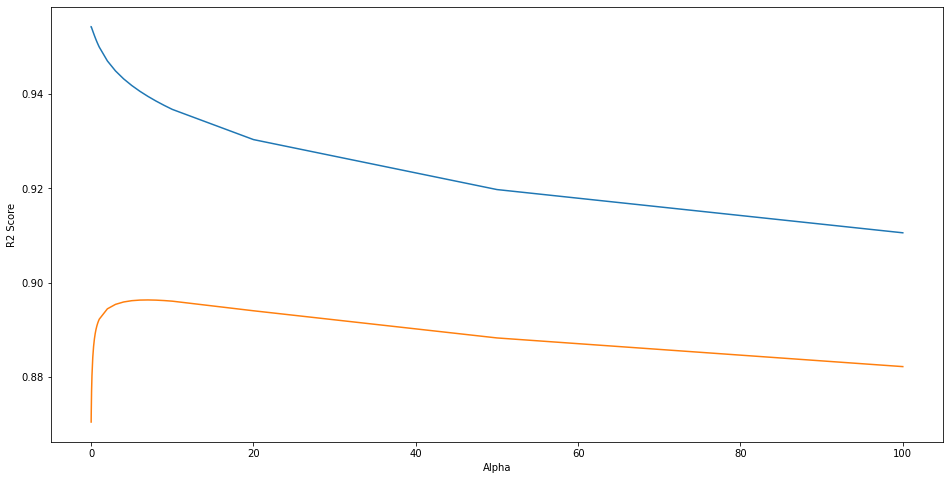

In [81]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [82]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 7.0}

In [83]:
ridge = Ridge(alpha = 7.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

print(mean_squared_error(y_test, y_test_pred))

0.9384943520537693
0.9322006384871107
0.009195261290903244


In [84]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
cols
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [85]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
0               MSSubClass  8.371989
16            BsmtFullBath  0.137384
13                2ndFlrSF  0.121820
59    Neighborhood_Edwards  0.099698
75     Neighborhood_Timber  0.090343
37             MSZoning_RH  0.080626
87         Condition2_PosA  0.078410
185       Electrical_FuseF  0.068882
39             MSZoning_RM  0.064903
231  SaleCondition_Partial  0.063793

# Testing Lasso Regression

In [86]:
lasso = Lasso()
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred  = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

print(mean_squared_error(y_test, y_test_pred))

0.782108120114882
0.7803563391825317
0.028836733550026746


In [87]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 11.293),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.002),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.0),
 ('GarageYrBlt', 0.0),
 ('GarageCars', -0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('Lan

In [88]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.084573      0.026091         0.005187        0.001532       0.0001   
1       0.026029      0.003497         0.004688        0.001097       0.0010   
2       0.012665      0.000898         0.004588        0.001196       0.0100   
3       0.042585      0.005608         0.004787        0.001075       0.0500   
4       0.032910      0.002855         0.004189        0.000977       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.746039           0.927557           0.756526   
1   {'alpha': 0.001}           0.712261           0.926450           0.867949   
2    {'alpha': 0.01}           0.665057           0.880160           0.846673   
3    {'alpha': 0.05}           0.583579           0.835344           0.803214   
4     {'alpha': 0.1}           0.546539           0.818942           0.777853   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.939935           0.927244           0.944515           0.954303   
1           0.948894           0.942267           0.952417           0.949718   
2           0.919323           0.900903           0.919242           0.934325   
3           0.880774           0.856463           0.900444           0.908256   
4           0.857942           0.834226           0.886142           0.889133   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.874922           0.922385           0.855150         0.884858   
1           0.872139           0.918231           0.837642         0.892797   
2           0.828746           0.890516           0.761778         0.854672   
3           0.775622           0.848919           0.685620         0.807823   
4           0.746260           0.823755           0.664321         0.784511   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.072914                2            0.954541            0.948803   
1        0.071308                1            0.934579            0.925740   
2        0.080053                3            0.890099            0.871405   
3        0.097507                4            0.847685            0.830114   
4        0.102200                5            0.828721            0.806376   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.959407            0.948429            0.948900   
1            0.934064            0.923637            0.923677   
2            0.876574            0.870516            0.871063   
3            0.832673            0.824379            0.825788   
4            0.811219            0.803035            0.805267   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.948453            0.946965            0.952006   
1            0.923051            0.923616            0.930563   
2            0.868729            0.868049            0.879596   
3            0.824061            0.822373            0.833339   
4            0.798876            0.798046            0.814360   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.949326            0.952895          0.950973         0.003595  
1            0.927613            0.932083          0.927862         0.004356  
2            0.872200            0.880802          0.874904         0.006551  
3            0.828282            0.842498          0.831119         0.007877  
4            0.805735            0.819865          0.809150         0.009110

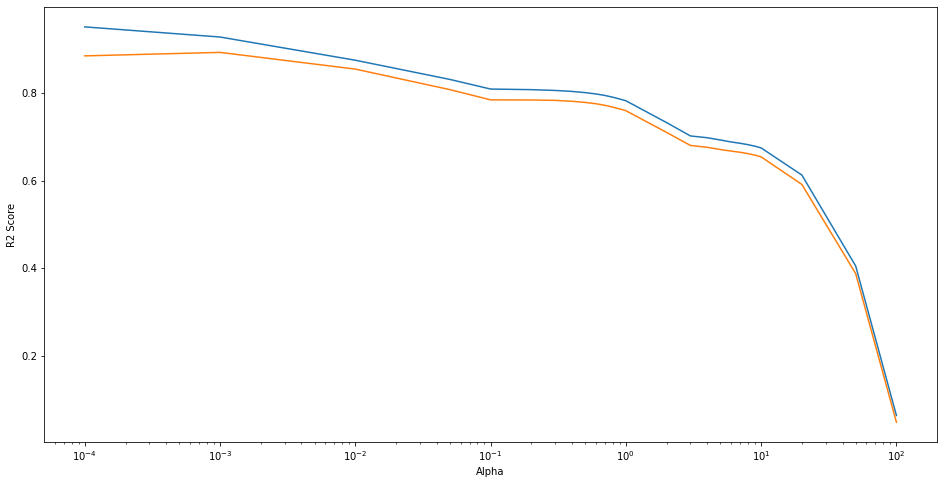

In [90]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [91]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [92]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

print(mean_squared_error(y_test, y_test_pred))

0.9261201999294437
0.931614756668598
0.008978210586009986


In [93]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [94]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature      Coef
0               MSSubClass  8.424357
13                2ndFlrSF  0.163534
16            BsmtFullBath  0.119960
59    Neighborhood_Edwards  0.108956
225           SaleType_Oth  0.089050
4              OverallCond  0.062831
75     Neighborhood_Timber  0.060626
69    Neighborhood_OldTown  0.057792
185       Electrical_FuseF  0.052019
231  SaleCondition_Partial  0.050053

# Final Model

Although Ridge and Lasso yeilded approximately results, but we will select Lasso as it pushes some coefficients to 0

In [95]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

print(mean_squared_error(y_test, y_test_pred))

0.9261201999294437
0.931614756668598
0.008978210586009986


#### Inferences
- Best alpha value for Lasso : {'alpha': 0.001}
- Best alpha value for Ridge : {'alpha': 7.0}

#### After compairing both the model we can see that the below Features are best explaining the DataSet

- MSSubClass	
- 2ndFlrSF	
- BsmtFullBath	
- Neighborhood_Edwards	
- SaleType_Oth	
- OverallCond	
- Neighborhood_Timber	
- Neighborhood_OldTown	
- Electrical_FuseF	
- SaleCondition_Partial	

# Subjective Questions

### Question 1:

In [96]:
ridge = Ridge(alpha = 14.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

print(mean_squared_error(y_test, y_test_pred))

0.9331798845770222
0.9317755142169455
0.008978210586009986


In [97]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
cols
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [98]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
0               MSSubClass  8.777739
13                2ndFlrSF  0.103140
16            BsmtFullBath  0.101899
59    Neighborhood_Edwards  0.086555
75     Neighborhood_Timber  0.066040
87         Condition2_PosA  0.059775
185       Electrical_FuseF  0.059521
231  SaleCondition_Partial  0.056970
4              OverallCond  0.055669
37             MSZoning_RH  0.052040

### Question 1:

In [99]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

0.9091567246057122
0.9239157287337203
0.00998900605502553


In [100]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [101]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature      Coef
0              MSSubClass  9.015349
13               2ndFlrSF  0.170666
59   Neighborhood_Edwards  0.082016
4             OverallCond  0.072745
225          SaleType_Oth  0.059379
3             OverallQual  0.050742
5               YearBuilt  0.046781
185      Electrical_FuseF  0.036127
69   Neighborhood_OldTown  0.034076
16           BsmtFullBath  0.033265

### Question 3:

In [102]:
to_drop = ['MSSubClass', '2ndFlrSF', 'BsmtFullBath', 'Neighborhood_Edwards', 'SaleType_Oth']
X_train = X_train.drop(to_drop,1)
X_test = X_test.drop(to_drop,1)

In [103]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

0.9243185413832583
0.9306995922051546
0.009098361350610025


In [104]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Lasso_Coef']

In [105]:
lasso_coef.sort_values(by='Lasso_Coef',ascending=False).head(10)

Feature  Lasso_Coef
0              LotFrontage    8.076026
14            BsmtHalfBath    0.286415
56    Neighborhood_Gilbert    0.112628
221            SaleType_WD    0.088764
71     Neighborhood_Timber    0.063522
3              OverallCond    0.063371
2              OverallQual    0.054479
65    Neighborhood_OldTown    0.052539
181       Electrical_FuseF    0.051115
226  SaleCondition_Partial    0.050208

In [ ]:
#!pip install jovian -q --upgrade

In [ ]:
#import jovian

In [ ]:
#jovian.commit()